<a href="https://colab.research.google.com/github/ashasch/project-python/blob/main/Insights_Discovery_for_Online_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Overview

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount("/content/drive")

%cd /content/drive/MyDrive/Mate/Python

df1 = pd.read_csv("countries.csv")
df1.head(10)


Mounted at /content/drive
/content/drive/MyDrive/Mate/Python


,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia
5,Andorra,AD,AND,Europe,Southern Europe
6,Angola,AO,AGO,Africa,Sub-Saharan Africa
7,Anguilla,AI,AIA,Americas,Latin America and the Caribbean
8,Antarctica,AQ,ATA,NaN,NaN
9,Antigua and Barbuda,AG,ATG,Americas,Latin America and the Caribbean


In [ ]:
df2 = pd.read_csv("events.csv")
df2.head(10)

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79
5,103450715,3/15/2015,4/18/2015,H,SVK,8681,Online,2220.0,651.21,524.96
6,103499639,4/20/2013,6/6/2013,L,FRA,4594,Online,6698.0,9.33,6.92
7,103762280,11/12/2011,12/14/2011,M,ESP,5988,Online,4419.0,154.06,90.93
8,103832662,9/19/2012,10/20/2012,H,HRV,7331,Offline,5247.0,255.28,159.42
9,104008615,1/23/2011,2/22/2011,M,DEU,2103,Online,7315.0,205.70,117.11


In [ ]:
df3 = pd.read_csv("products.csv")
df3.head(10)

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies
5,4594,Fruits
6,5988,Vegetables
7,7331,Baby Food
8,8875,Meat
9,8293,Cosmetics


In [ ]:
print(df1.isna().sum())

print(df1.isna().sum() / df1.shape[0] * 100)

name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64
name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


In [ ]:
print(df2.isna().sum())

print(df2.isna().sum() / df2.shape[0] * 100)

Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


In [ ]:
print(df3.isna().sum())

print(df3.isna().sum() / df3.shape[0] * 100)

id           0
item_type    0
dtype: int64
id           0.0
item_type    0.0
dtype: float64


# Data cleaning

In [ ]:
df1.fillna({"alpha-2": "Unknown", "region": "Unknown", "sub-region": "Unknown"}, inplace=True)
df1 = df1.drop_duplicates()

df2['Country Code'].fillna("Unknown", inplace=True)
df2['Units Sold'].fillna(df2['Units Sold'].median(), inplace=True)
df2['Order Date'] = pd.to_datetime(df2['Order Date'])
df2['Ship Date'] = pd.to_datetime(df2['Ship Date'])
df2 = df2.drop_duplicates()

df3 = df3.drop_duplicates()


<ipython-input-5-b8270d3f1730>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Country Code'].fillna("Unknown", inplace=True)
<ipython-input-5-b8270d3f1730>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

Значення коду країни (alpha-2), регіону та субрегіону є категоричними, і заміна на "Unknown" доцільна для збереження всіх записів, оскільки ці дані можуть бути корисними для аналізу. Видалення таких записів призведе до втрати значної частини даних (40.16%).

Колонка Country Code - пропущені значення становлять 6.17%. Записи без коду країни можуть залишитися, якщо країна невідома, тому "Unknown" є доречним.
Видалення цих записів також допустиме, якщо дані про країну критично важливі для аналізу.

Колонка Units Sold: пропущені значення становлять 0.15%. Значення продажів можна заповнити медіаною, оскільки вона є стійкою до аномальних даних.
Видалення записів не рекомендоване через малу частку пропусків. Колонки Order Date, Ship Date пропусків немає, але ці колонки правильно перетворені на формат дат (datetime) для аналізу.

In [ ]:
df1.describe()

,name,alpha-2,alpha-3,region,sub-region
count,249,249,249,249,249
unique,249,249,249,6,18
top,Afghanistan,AF,AFG,Africa,Sub-Saharan Africa
freq,1,1,1,60,53


In [ ]:
df2.describe()

,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330,1330,1330.000000,1330.000000,1330.000000,1330.000000
mean,5.412048e+08,2013-10-12 06:09:12.180451072,2013-11-06 00:46:33.383458816,5788.096241,4952.216541,264.893541,187.246812
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,2011-12-16 06:00:00,2012-01-03 00:00:00,3127.000000,2360.750000,81.730000,35.840000
50%,5.387164e+08,2013-10-17 00:00:00,2013-11-09 00:00:00,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,2015-08-28 18:00:00,2015-10-03 18:00:00,8681.000000,7458.750000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573882e+08,NaN,NaN,2820.728878,2903.012194,217.323460,176.158873


# Data analysis and visualization

In [ ]:
df_combined = df2.merge(df3, left_on='Product ID', right_on='id', how='left')
df_combined = df_combined.merge(df1, left_on='Country Code', right_on='alpha-3', how='left')
df_combined['Revenue'] = df_combined['Units Sold'] * df_combined['Unit Price']

df_combined.rename(columns={
    'item_type': 'Category',
    'name': 'Country',
    'region': 'Region',
    'sub-region': 'SubRegion'
}, inplace=True)


In [ ]:
df_combined['Profit'] = (df_combined['Unit Price'] - df_combined['Unit Cost']) * df_combined['Units Sold']
df_combined['Sales Channel'] = df_combined['Sales Channel'].str.lower()
df_combined['Revenue'] = df_combined['Units Sold'] * df_combined['Unit Price']

total_orders = df_combined['Order ID'].nunique()
total_profit = df_combined['Profit'].sum()
total_countries = df_combined['Country'].nunique()
avg_units_sold = df_combined['Units Sold'].mean()

print(f"Загальна кількість замовлень: {total_orders}")
print(f"Загальний прибуток: {total_profit}")
print(f"Загальна кількість охоплених країн: {total_countries}")
print(f"Середня кількість одиниць проданих товарів на замовлення: {avg_units_sold:.2f}")


Загальна кількість замовлень: 1330
Загальний прибуток: 501842633.12
Загальна кількість охоплених країн: 45
Середня кількість одиниць проданих товарів на замовлення: 4952.22


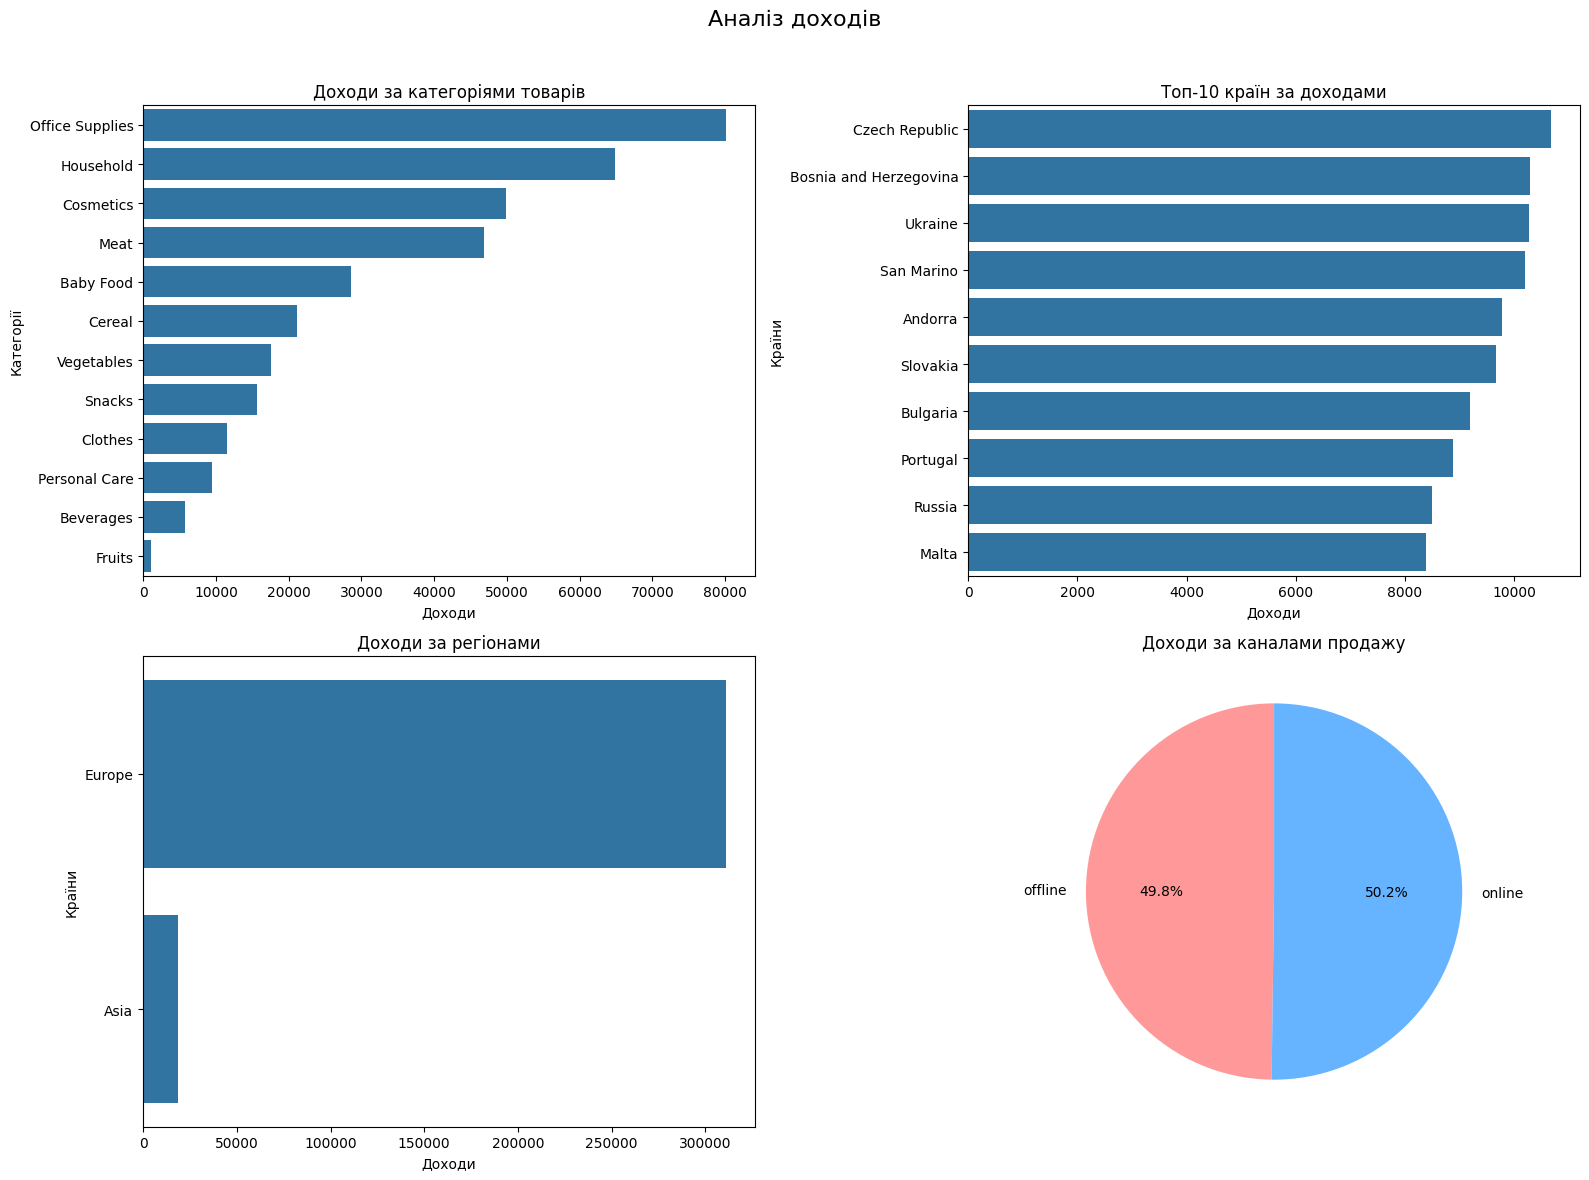

In [ ]:
# Масив графіків для доходів
revenue_by_category = df_combined.groupby('Category')['Unit Price'].sum().sort_values(ascending=False)
revenue_by_country = df_combined.groupby('Country')['Unit Price'].sum().sort_values(ascending=False).head(10)
revenue_by_region = df_combined.groupby('Region')['Unit Price'].sum().sort_values(ascending=False).head(10)
revenue_by_channel = df_combined.groupby('Sales Channel')['Unit Price'].sum()

# Масив графіків для доходів
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Аналіз доходів", fontsize=16)

# Доходи за категоріями
sns.barplot(ax=axes[0, 0], x=revenue_by_category.values, y=revenue_by_category.index)
axes[0, 0].set_title("Доходи за категоріями товарів")
axes[0, 0].set_xlabel("Доходи")
axes[0, 0].set_ylabel("Категорії")

# Доходи за країнами
sns.barplot(ax=axes[0, 1], x=revenue_by_country.values, y=revenue_by_country.index)
axes[0, 1].set_title("Топ-10 країн за доходами")
axes[0, 1].set_xlabel("Доходи")
axes[0, 1].set_ylabel("Країни")

# Доходи за регіонами
sns.barplot(ax=axes[1,0], x=revenue_by_region.values, y=revenue_by_region.index)
axes[1, 0].set_title("Доходи за регіонами")
axes[1, 0].set_xlabel("Доходи")
axes[1, 0].set_ylabel("Країни")

# Доходи за каналами
revenue_by_channel.plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
axes[1, 1].set_title("Доходи за каналами продажу")
axes[1, 1].set_ylabel("")


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Лідер** продажів: Категорія *Office Supplies* є найприбутковішою, з великим відривом від інших категорій. Це свідчить про те, що споживачі активно купують офісні товари, можливо, через високу регулярність попиту. *Household*: друге місце, що вказує на високий інтерес до товарів для дому.
*Cosmetics*, *Meat*, і *Baby Food*: демонструють стабільні доходи, що свідчить про їхню затребуваність. *Fruits* та *Beverages* мають найменший прибуток, що може свідчити про низький попит або вищу конкуренцію на ринку. Враховуючи популярність *Office Supplies*, *Household*, і *Cosmetics*, варто приділити увагу розширенню асортименту, знижкам, або спеціальним акціям для цих товарів. Для категорій із низькими доходами (*Fruits, Beverages*), необхідно провести додатковий аналіз: чи є проблема в позиціонуванні, якості, ціні, чи це просто низький ринковий попит.

*Czech Republic*, *Bosnia and Herzegovina*, *Ukraine* **лідирують за прибутками**. Це може свідчити про економічну активність або ефективну логістику та маркетинг у цих країнах. Країни з низькими доходами можна розглядати як потенційні ринки для розширення. Необхідно дослідити причини успіху в *Czech Republic*, *Bosnia and Herzegovina*, *Ukraine*, щоб адаптувати ці стратегії для інших ринків.


*Європа* є **основним джерелом прибутків**, що може бути пов'язано з основною аудиторією або логістичними перевагами в цьому регіоні. Враховуючи домінування Європи, компанія може розглянути шляхи виходу на інші регіональні ринки, де попит низький, шляхом локалізації продукції або поліпшення маркетингових стратегій.


Доходи від онлайн- та офлайн-продажів **майже рівні**, що вказує на баланс між двома каналами збуту. Можна розглянути інвестиції у вдосконалення онлайн-каналу, оскільки він потенційно може знизити витрати на інфраструктуру і залучити більше клієнтів через зручність.



Загалом, **компанія демонструє хорошу динаміку** в ключових категоріях і країнах, але має потенціал для розвитку в нових регіонах і оптимізації каналів продажів.

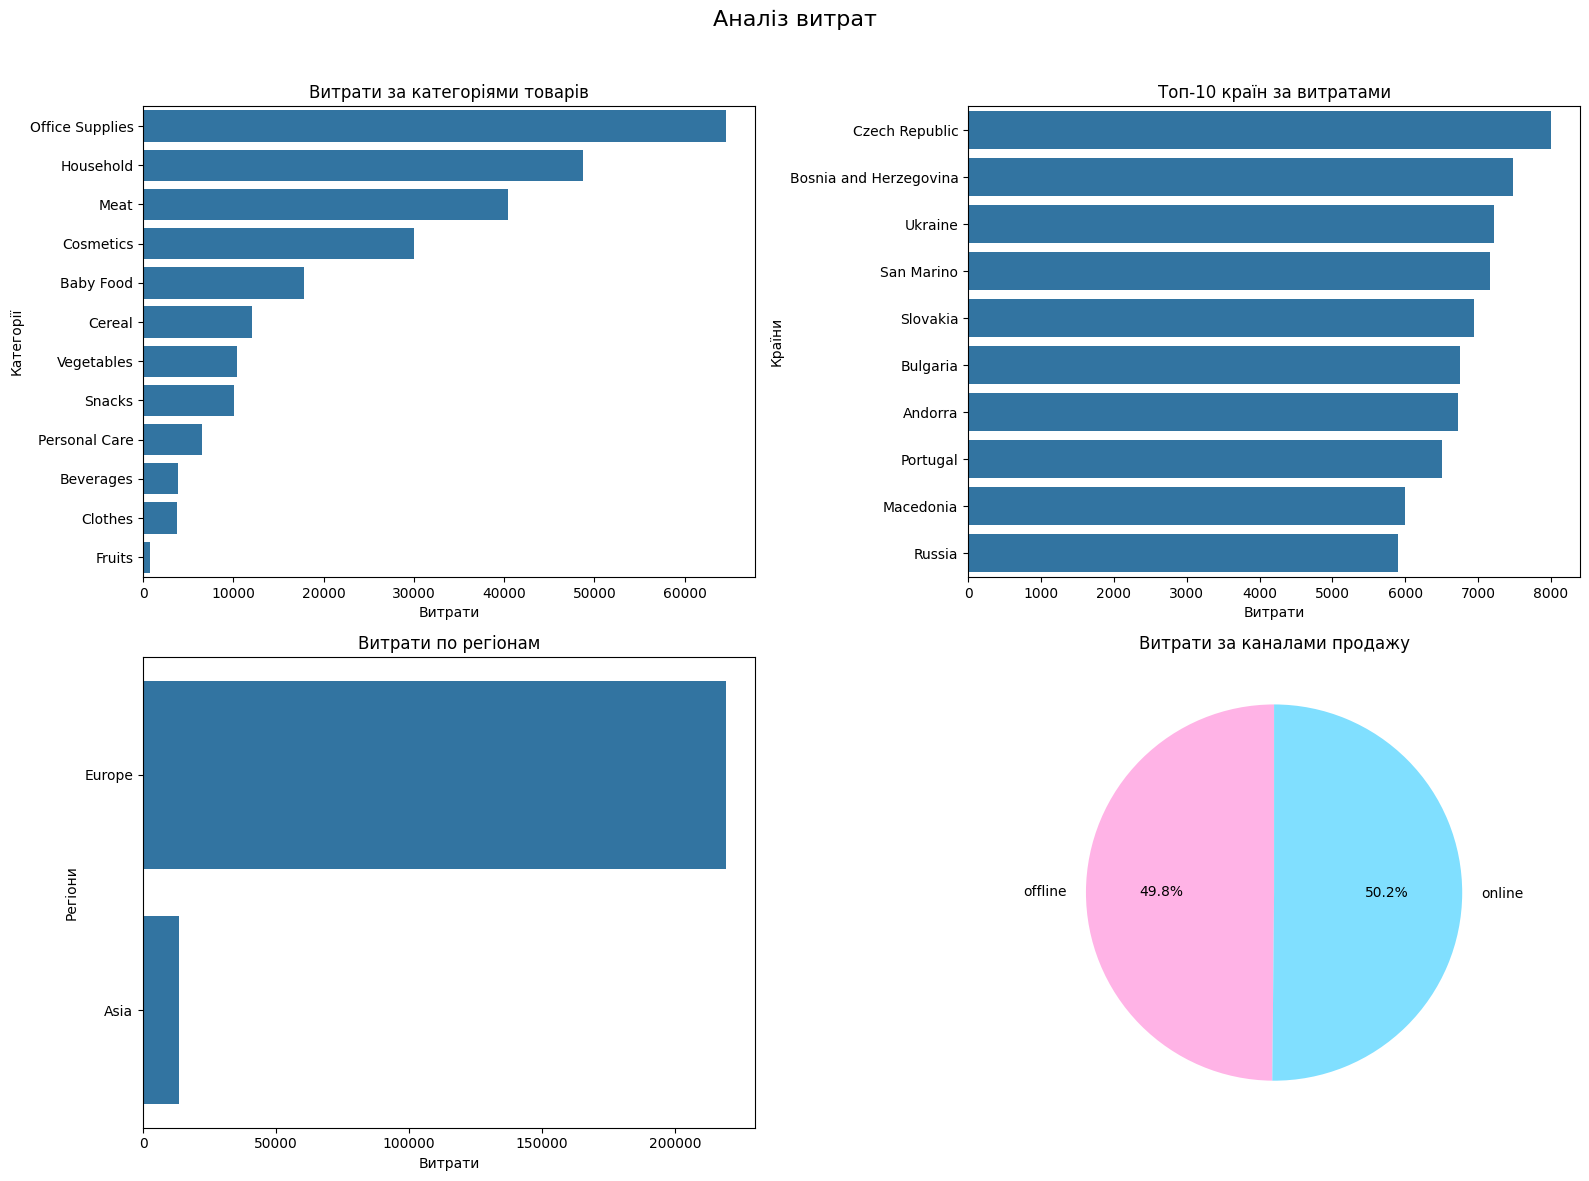

In [ ]:
# Масив графіків для витрат
cost_by_category = df_combined.groupby('Category')['Unit Cost'].sum().sort_values(ascending=False)
cost_by_country = df_combined.groupby('Country')['Unit Cost'].sum().sort_values(ascending=False).head(10)
cost_by_region = df_combined.groupby('Region')['Unit Cost'].sum().sort_values(ascending=False).head(10)
cost_by_channel = df_combined.groupby('Sales Channel')['Unit Cost'].sum()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Аналіз витрат", fontsize=16)

# Витрати за категоріями
sns.barplot(ax=axes[0, 0], x=cost_by_category.values, y=cost_by_category.index)
axes[0, 0].set_title("Витрати за категоріями товарів")
axes[0, 0].set_xlabel("Витрати")
axes[0, 0].set_ylabel("Категорії")

# Витрати за країнами
sns.barplot(ax=axes[0, 1], x=cost_by_country.values, y=cost_by_country.index)
axes[0, 1].set_title("Топ-10 країн за витратами")
axes[0, 1].set_xlabel("Витрати")
axes[0, 1].set_ylabel("Країни")

# Витрати за регіонами
sns.barplot(ax=axes[1, 0], x=cost_by_region.values, y=cost_by_region.index)
axes[1, 0].set_title("Витрати по регіонам")
axes[1, 0].set_xlabel("Витрати")
axes[1, 0].set_ylabel("Регіони")

# Витрати за каналами
cost_by_channel.plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%', startangle=90, colors=['#ffb3e6', '#80dfff'])
axes[1, 1].set_title("Витрати за каналами продажу")
axes[1, 1].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Найбільше витрат припадає на *Office Supplies*, що може вказувати на високу потребу або популярність цієї категорії серед клієнтів. Друге місце займають *Household*, що свідчить про стабільний попит на предмети першої необхідності. Продукти харчування, такі як *Meat* та *Baby Food*, займають значну частку витрат, що підтверджує важливість продовольчого сектору. Можливо краще зосередити маркетингові зусилля на популярних категоріях товарів, але також дослідити причини низького попиту на певні категорії.

Лідером за витратами є *Czech Republic*, що може свідчити про високий рівень купівельної спроможності чи активне споживання в цій країні. *Bosnia and Herzegovina*, *Ukraine* займають наступні місця, що може свідчити про зростання попиту в цих країнах.

*Європа* домінує у витратах, що вказує на основний фокус бізнесу в цьому регіоні. Витрати в *Азії* значно нижчі, що може бути зумовлено слабким представництвом або низьким попитом.

Витрати рівномірно розподілені між *онлайн (50.2%)* та *офлайн (49.8%)* каналами продажів. Це свідчить про збалансовану стратегію продажів та рівноцінне значення обох каналів.

<ipython-input-13-11c0e48e9743>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-13-11c0e48e9743>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-13-11c0e48e9743>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


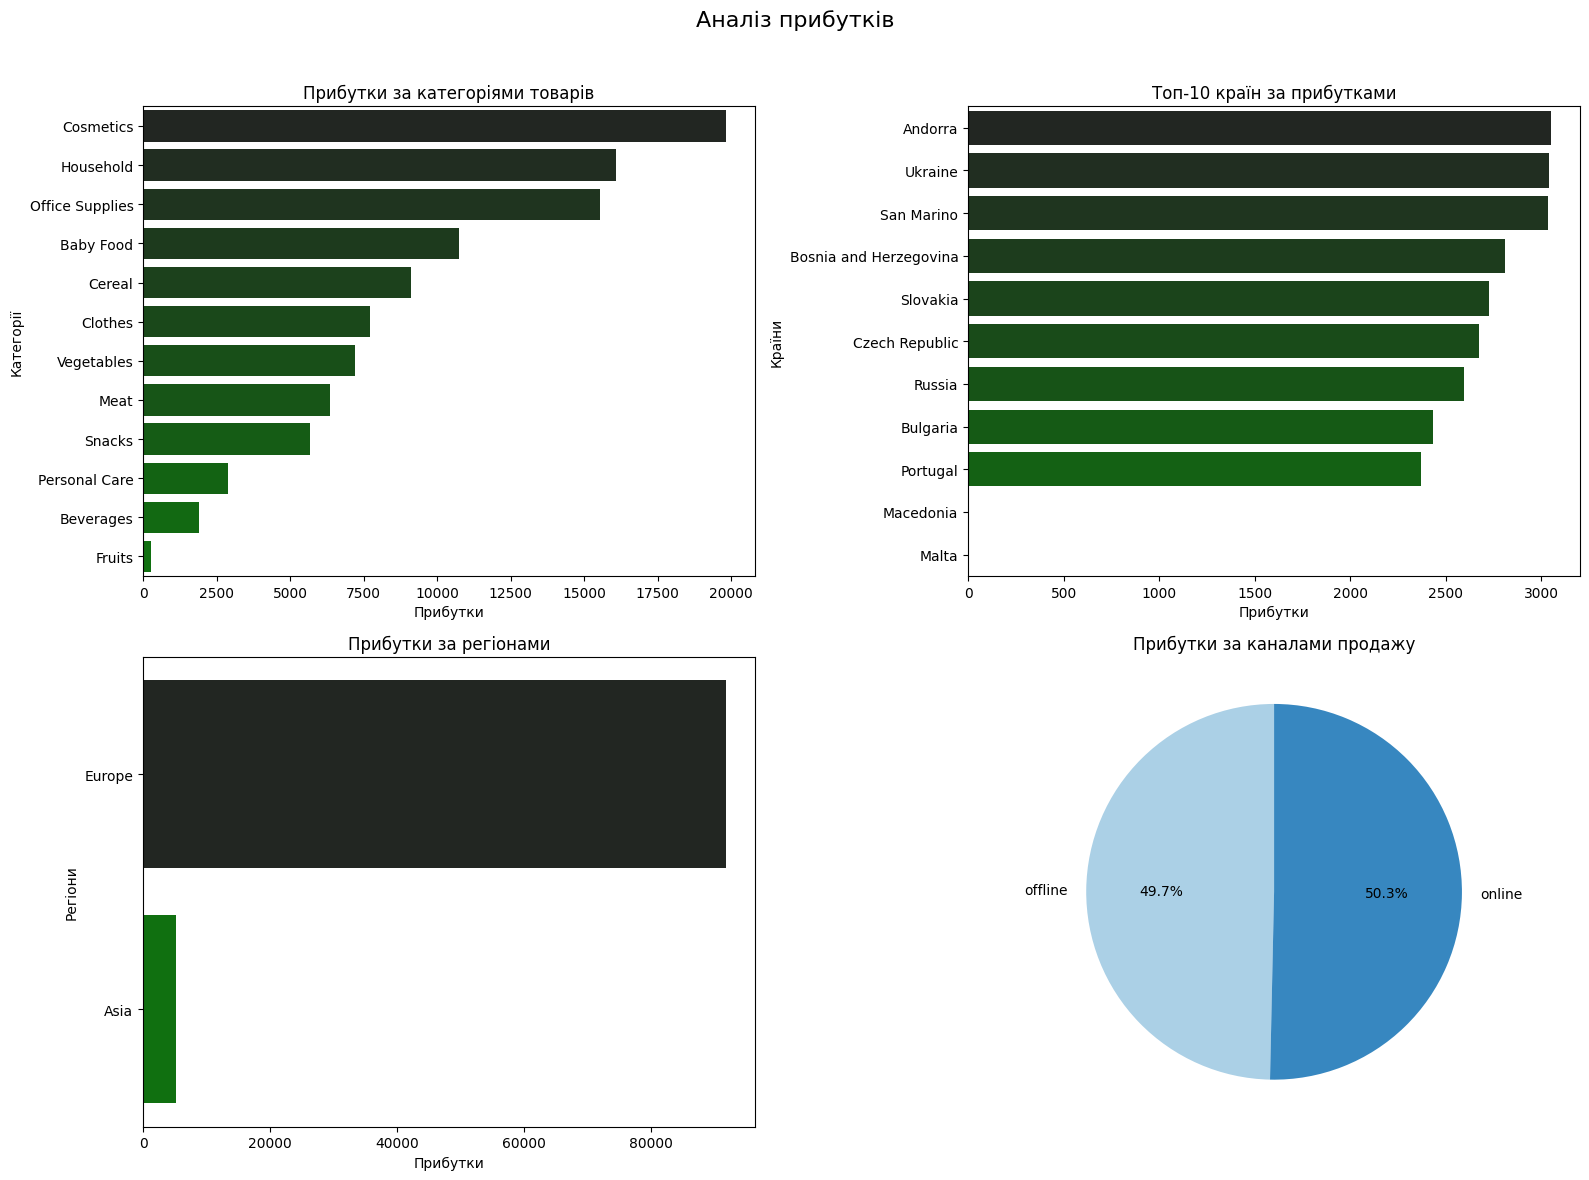

In [ ]:
# Масив графіків для прибутків
profit_by_category = revenue_by_category - cost_by_category
profit_by_country = revenue_by_country - cost_by_country
profit_by_region = revenue_by_region - cost_by_region
profit_by_channel = revenue_by_channel - cost_by_channel

# Сортування даних за зростанням
profit_by_category_sorted = profit_by_category.sort_values(ascending=False)
profit_by_country_sorted = profit_by_country.sort_values(ascending=False)
profit_by_region_sorted = profit_by_region.sort_values(ascending=False)
profit_by_channel_sorted = profit_by_channel.sort_values()

from matplotlib import cm

category_palette = sns.dark_palette("green", n_colors=len(profit_by_category_sorted))
country_palette = sns.dark_palette("green", n_colors=len(profit_by_country_sorted))
region_palette = sns.dark_palette("green", n_colors=len(profit_by_region_sorted))

# Побудова графіків
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Аналіз прибутків", fontsize=16)

# Прибутки за категоріями
sns.barplot(
    ax=axes[0, 0],
    x=profit_by_category_sorted.values,
    y=profit_by_category_sorted.index,
    palette=category_palette,
)
axes[0, 0].set_title("Прибутки за категоріями товарів")
axes[0, 0].set_xlabel("Прибутки")
axes[0, 0].set_ylabel("Категорії")

# Прибутки за країнами
sns.barplot(
    ax=axes[0, 1],
    x=profit_by_country_sorted.values,
    y=profit_by_country_sorted.index,
    palette=country_palette,
)
axes[0, 1].set_title("Топ-10 країн за прибутками")
axes[0, 1].set_xlabel("Прибутки")
axes[0, 1].set_ylabel("Країни")

# Прибутки за регіонами
sns.barplot(
    ax=axes[1, 0],
    x=profit_by_region_sorted.values,
    y=profit_by_region_sorted.index,
    palette=region_palette,
)
axes[1, 0].set_title("Прибутки за регіонами")
axes[1, 0].set_xlabel("Прибутки")
axes[1, 0].set_ylabel("Регіони")

# Прибутки за каналами (залишаємо як кругову діаграму)
profit_by_channel_sorted.plot(
    kind="pie",
    ax=axes[1, 1],
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("Blues", len(profit_by_channel_sorted)),
)
axes[1, 1].set_title("Прибутки за каналами продажу")
axes[1, 1].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Найвищі прибутки отримано від *Cosmetics*, що свідчить про високий рівень маржі та попиту на цю категорію.
Друге і третє місця займають  *Household* та  *Office Supplies*, що демонструє стабільну дохідність цих сегментів. *Baby Food* та  *Cereal* також є прибутковими, що може свідчити про стабільний попит серед сімей. Найменш прибутковими є *Fruits*, *Beverages* та  *Personal Care*, що, ймовірно, зумовлено нижчими цінами чи вищою конкуренцією. Низькоприбуткові категорії потребують аналізу, щоб з'ясувати причини низької ефективності та оцінити доцільність їхнього подальшого розвитку.

Найприбутковішими країнами є *Andora*, *Ukraine* та *San Marino*, що вказує на ефективні бізнес-операції та високий попит у цих країнах. *Malta* знаходиться внизу рейтингу, що може вказувати на обмежений ринок або низьку купівельну спроможність.

*Europe* приносить основну частину прибутків, тоді як *Asia* має значно нижчі показники. Це вказує на зосередженість бізнесу в європейському регіоні. Варто досліджувати потенціал азіатського ринку, враховуючи його великий населення та можливість для масштабування. Залучити локальних партнерів чи адаптувати стратегії продажів для підвищення конкурентоспроможності в Азії.

Онлайн-продажі (50.3%) та офлайн-продажі (49.7%) мають майже рівний розподіл прибутків. Це свідчить про збалансовану багатоканальну стратегію, яка дозволяє бізнесу ефективно охоплювати аудиторію.

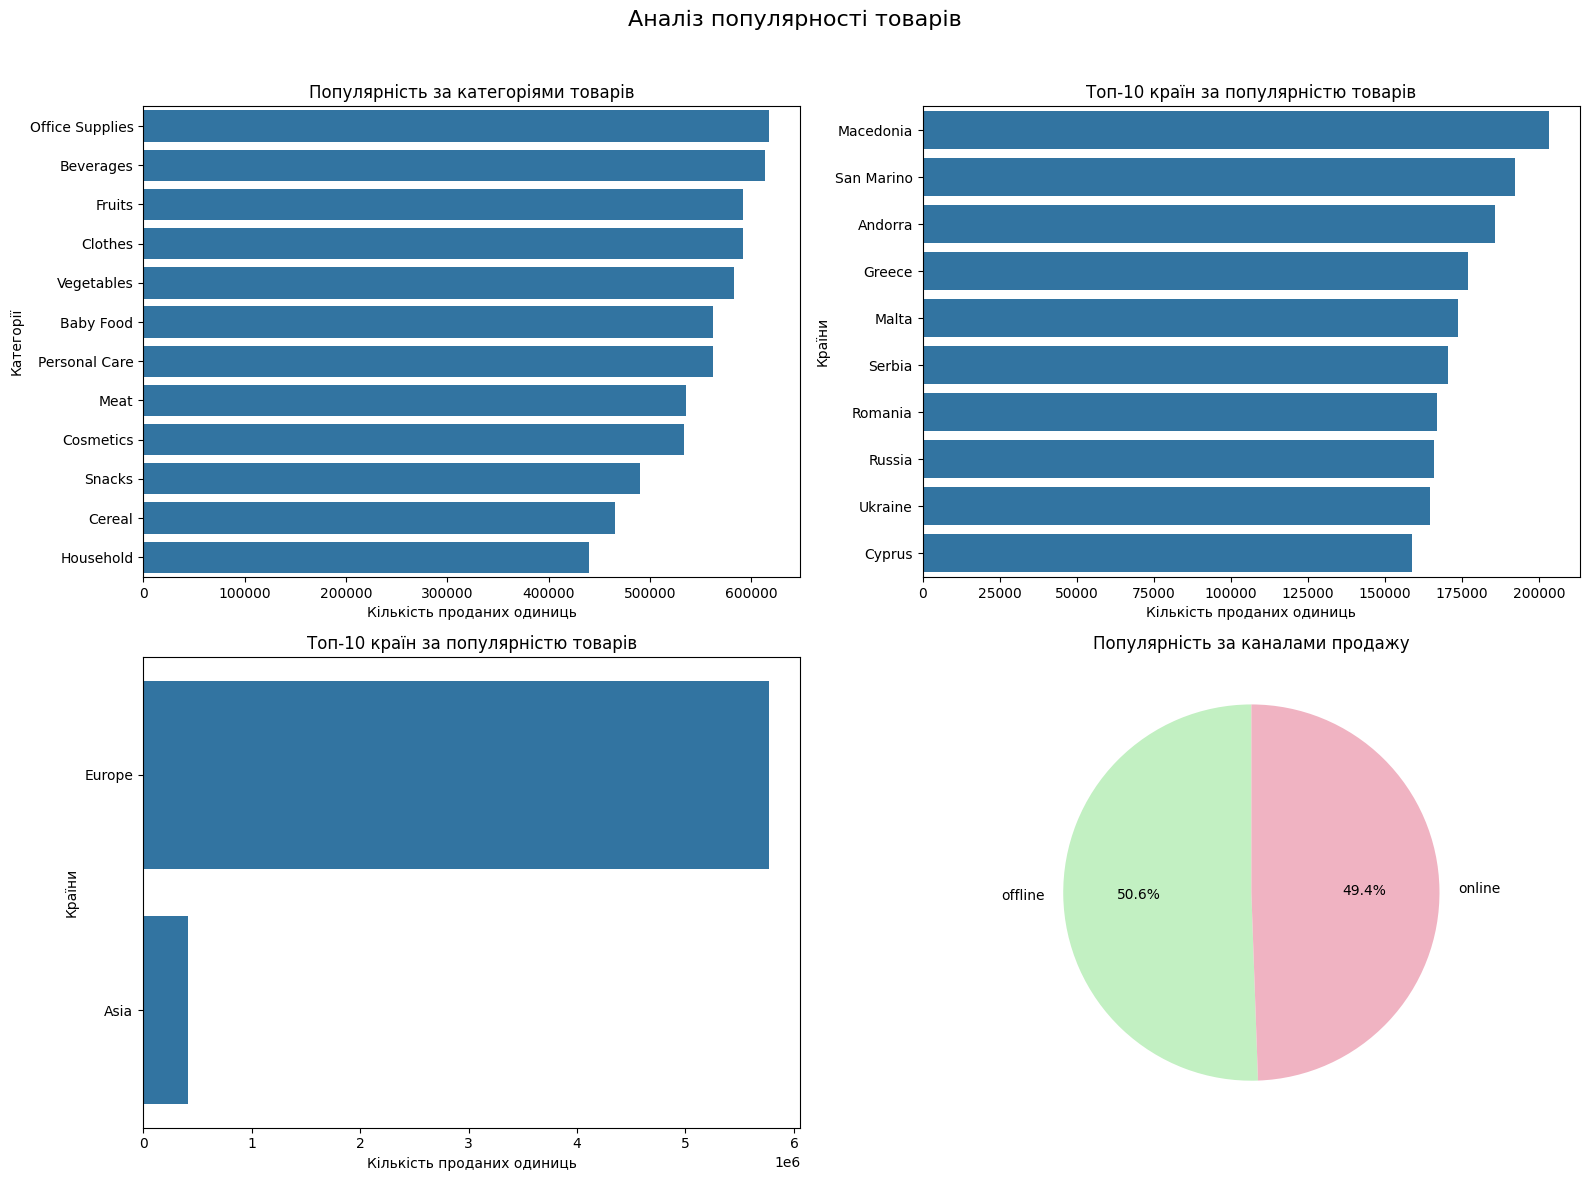

In [ ]:
# Масив графіків для популярності товарів
popularity_by_category = df_combined.groupby('Category')['Units Sold'].sum().sort_values(ascending=False)
popularity_by_country = df_combined.groupby('Country')['Units Sold'].sum().sort_values(ascending=False).head(10)
popularity_by_region = df_combined.groupby('Region')['Units Sold'].sum().sort_values(ascending=False).head(10)
popularity_by_channel = df_combined.groupby('Sales Channel')['Units Sold'].sum()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Аналіз популярності товарів", fontsize=16)

# Популярність за категоріями
sns.barplot(ax=axes[0, 0], x=popularity_by_category.values, y=popularity_by_category.index)
axes[0, 0].set_title("Популярність за категоріями товарів")
axes[0, 0].set_xlabel("Кількість проданих одиниць")
axes[0, 0].set_ylabel("Категорії")

# Популярність за країнами
sns.barplot(ax=axes[0, 1], x=popularity_by_country.values, y=popularity_by_country.index)
axes[0, 1].set_title("Топ-10 країн за популярністю товарів")
axes[0, 1].set_xlabel("Кількість проданих одиниць")
axes[0, 1].set_ylabel("Країни")

# Популярність за регіонами
sns.barplot(ax=axes[1, 0], x=popularity_by_region.values, y=popularity_by_region.index)
axes[1, 0].set_title("Топ-10 країн за популярністю товарів")
axes[1, 0].set_xlabel("Кількість проданих одиниць")
axes[1, 0].set_ylabel("Країни")

# Популярність за каналами
popularity_by_channel.plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%', startangle=90, colors=['#c2f0c2', '#f0b3c2'])
axes[1, 1].set_title("Популярність за каналами продажу")
axes[1, 1].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

*Office Supplies* є найбільш популярною категорією, значно випереджаючи інші, що може свідчити про високу потребу у цих товарах серед клієнтів. *Beverages* та *Fruits* посідають друге та третє місця, що свідчить про значний попит на продукти щоденного споживання. *Household* мають найнижчий рівень популярності серед представлених категорій.

*Macedonia*, *San Marino* та *Andora* займають лідируючі позиції за кількістю проданих одиниць, що свідчить про високий рівень попиту в цих країнах. *Cyprus* завершує список, показуючи найменший обсяг проданих одиниць. Слід активно підтримувати попит у країнах-лідерах, зосереджуючи зусилля на утриманні ринкових позицій.

Як і в попередніх аналізах, *Europe* є основним ринком із домінуючим обсягом проданих одиниць. *Asia* демонструє значно нижчий рівень популярності товарів, що може вказувати на менше охоплення ринку або слабшу представленість бренду.

Популярність онлайн-продажів (49.1%) майже зрівнялася з офлайн-продажами (50.9%). Це свідчить про стабільну важливість обох каналів для клієнтів. Збалансований розподіл між офлайн- і онлайн-продажами забезпечує широкий охоплення клієнтів.

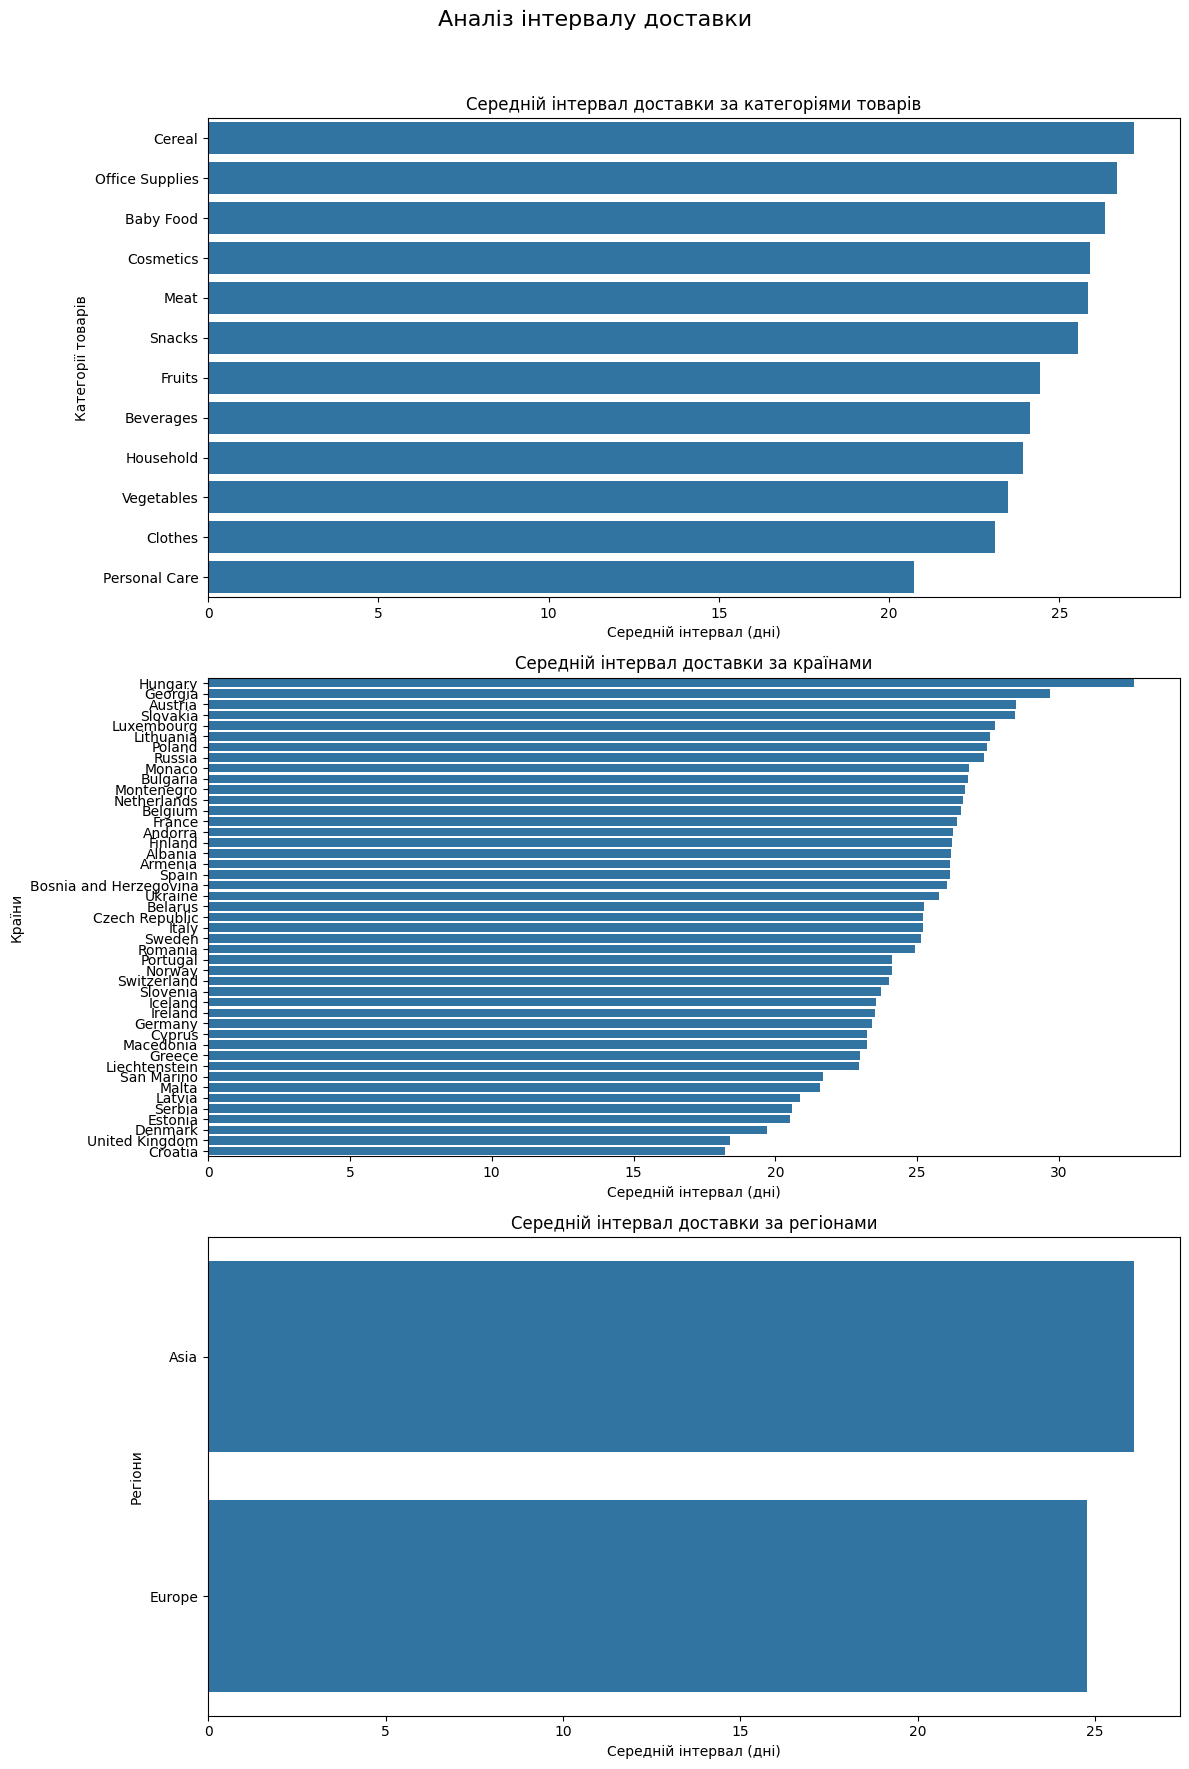

In [ ]:
df_combined['Order Date'] = pd.to_datetime(df_combined['Order Date'])
df_combined['Ship Date'] = pd.to_datetime(df_combined['Ship Date'])

df_combined['Shipping Interval'] = (df_combined['Ship Date'] - df_combined['Order Date']).dt.days

interval_by_category = df_combined.groupby('Category')['Shipping Interval'].mean().sort_values(ascending=False)
interval_by_country = df_combined.groupby('Country')['Shipping Interval'].mean().sort_values(ascending=False)
interval_by_region = df_combined.groupby('Region')['Shipping Interval'].mean().sort_values(ascending=False)

# Візуалізація
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle("Аналіз інтервалу доставки", fontsize=16)

sns.barplot(
    ax=axes[0],
    x=interval_by_category.values,
    y=interval_by_category.index
)
axes[0].set_title("Середній інтервал доставки за категоріями товарів")
axes[0].set_xlabel("Середній інтервал (дні)")
axes[0].set_ylabel("Категорії товарів")

sns.barplot(
    ax=axes[1],
    x=interval_by_country.values,
    y=interval_by_country.index
)
axes[1].set_title("Середній інтервал доставки за країнами")
axes[1].set_xlabel("Середній інтервал (дні)")
axes[1].set_ylabel("Країни")


sns.barplot(
    ax=axes[2],
    x=interval_by_region.values,
    y=interval_by_region.index
)
axes[2].set_title("Середній інтервал доставки за регіонами")
axes[2].set_xlabel("Середній інтервал (дні)")
axes[2].set_ylabel("Регіони")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Найдовший інтервал обробки мають товари категорії Cereal (близько 25 днів)
Office Supplies, Baby Food та Cosmetics також мають тривалий час обробки (23-24 дні). Найшвидше обробляються замовлення категорії Personal Care (близько 20 днів). Більшість категорій мають інтервал обробки в діапазоні 21-24 дні.

Найдовший час обробки замовлень спостерігається в Угорщині та Грузії (близько 30 днів).Найкоротший час обробки в Хорватії та Великій Британії (близько 20 днів). Більшість європейських країн мають інтервал обробки між 22-28 днями
Помітна значна варіація між країнами (різниця до 10 днів).

Спостерігається майже однаковий час обробки для Азії та Європи (приблизно 25 днів). Різниця між регіонами мінімальна (менше 1 дня).

Категорія товару має більший вплив на час обробки, ніж регіон доставки. Існує значна варіація в часі обробки між різними країнами. В середньому час від замовлення до відвантаження становить 20-30 днів. Регіональні відмінності майже відсутні, що вказує на стандартизовані процеси обробки на рівні регіонів

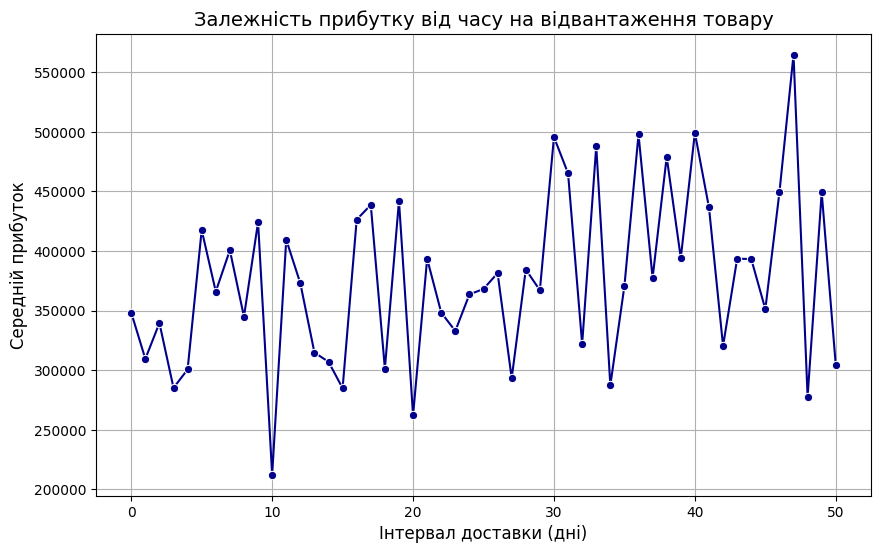

In [ ]:
# Агрегування за інтервалом доставки
profit_by_shipping_interval = (
    df_combined.groupby('Shipping Interval')['Profit'].mean().reset_index().sort_values('Shipping Interval'))

# Візуалізація
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=profit_by_shipping_interval,
    x='Shipping Interval',
    y='Profit',
    marker='o',
    color='darkblue'
)
plt.title('Залежність прибутку від часу на відвантаження товару', fontsize=14)
plt.xlabel('Інтервал доставки (дні)', fontsize=12)
plt.ylabel('Середній прибуток', fontsize=12)
plt.grid(True)
plt.show()

Найнижчі показники прибутку (близько 200,000-250,000) спостерігаються при інтервалі доставки близько 10 та 20 днів. Найвищі піки прибутку (500,000-560,000) припадають на інтервали 30-50 днів. При коротких термінах доставки (0-15 днів) прибуток відносно стабільний і коливається в межах 300,000-400,000.

Чіткої лінійної залежності між часом відвантаження та прибутком не спостерігається. Проте, замовлення з довшим терміном відвантаження (30+ днів) частіше показують вищий прибуток. Можливо, це пов'язано з тим, що більші або складніші замовлення потребують довшого часу на обробку і при цьому генерують більший прибуток.

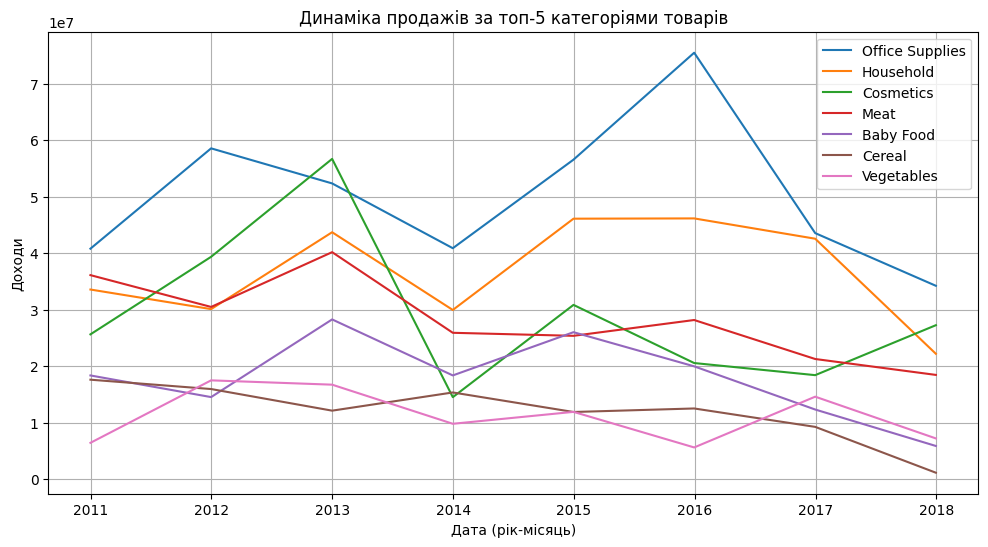

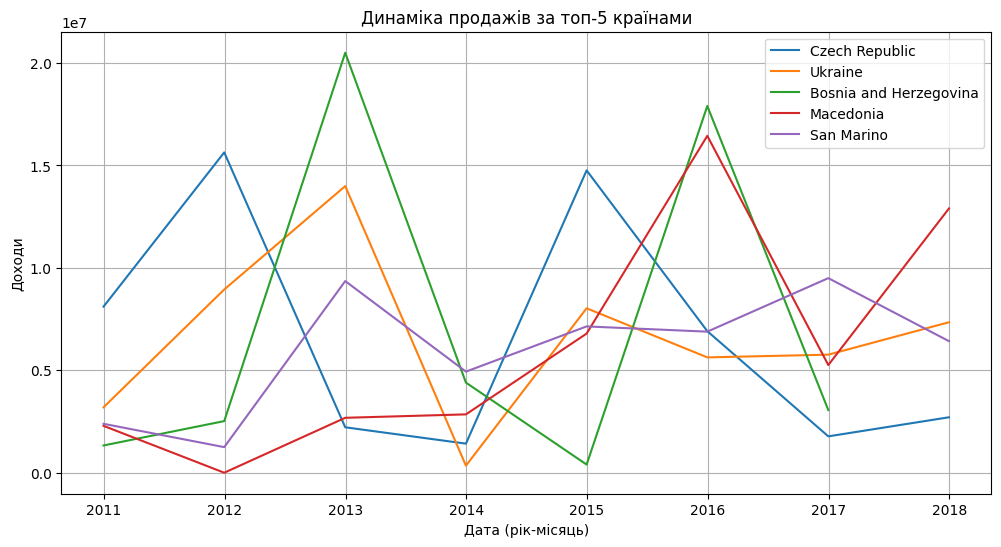

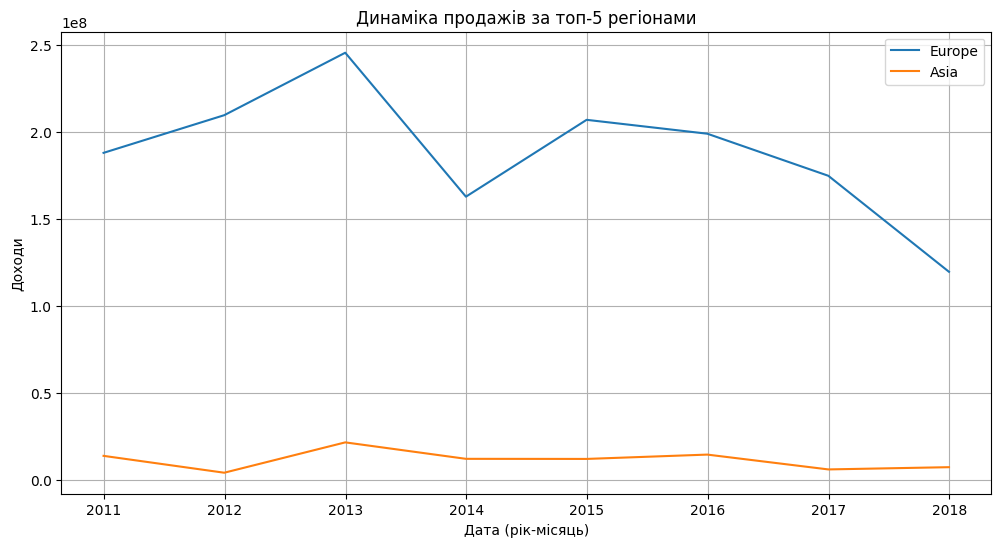

In [ ]:
Вdf_combined['Order Date'] = pd.to_datetime(df_combined['Order Date'])

# Обчислення топ-5 категорій, країн та регіонів за загальним доходом
top_categories = df_combined.groupby('Category')['Revenue'].sum().nlargest(7).index
top_countries = df_combined.groupby('Country')['Revenue'].sum().nlargest(5).index
top_regions = df_combined.groupby('Region')['Revenue'].sum().nlargest(5).index

# Фільтрація даних для топ-5
filtered_categories = df_combined[df_combined['Category'].isin(top_categories)]
filtered_countries = df_combined[df_combined['Country'].isin(top_countries)]
filtered_regions = df_combined[df_combined['Region'].isin(top_regions)]

# Динаміка продажів для категорій
time_series_category = (
    filtered_categories.set_index('Order Date')
    .groupby('Category')['Revenue']
    .resample('YE')
    .sum()
    .reset_index()
)

plt.figure(figsize=(12, 6))
for category in top_categories:
    category_data = time_series_category[time_series_category['Category'] == category]
    plt.plot(category_data['Order Date'], category_data['Revenue'], label=category)

plt.xlabel("Дата (рік-місяць)")
plt.ylabel("Доходи")
plt.title("Динаміка продажів за топ-5 категоріями товарів")
plt.legend()
plt.grid(True)
plt.show()

# Динаміка продажів для країн
time_series_country = (
    filtered_countries.set_index('Order Date')
    .groupby('Country')['Revenue']
    .resample('YE')
    .sum()
    .reset_index()
)

plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = time_series_country[time_series_country['Country'] == country]
    plt.plot(country_data['Order Date'], country_data['Revenue'], label=country)

plt.xlabel("Дата (рік-місяць)")
plt.ylabel("Доходи")
plt.title("Динаміка продажів за топ-5 країнами")
plt.legend()
plt.grid(True)
plt.show()

# Динаміка продажів для регіонів
time_series_region = (
    filtered_regions.set_index('Order Date')
    .groupby('Region')['Revenue']
    .resample('YE')
    .sum()
    .reset_index()
)

plt.figure(figsize=(12, 6))
for region in top_regions:
    region_data = time_series_region[time_series_region['Region'] == region]
    plt.plot(region_data['Order Date'], region_data['Revenue'], label=region)

plt.xlabel("Дата (рік-місяць)")
plt.ylabel("Доходи")
plt.title("Динаміка продажів за топ-5 регіонами")
plt.legend()
plt.grid(True)
plt.show()


Office Supplies є беззаперечним лідером продажів з найвищим піком у 2016 році. Household стабільно тримає другу позицію з відносно стабільними продажами. Cosmetics показує значну волатильність з піком у 2013 році та подальшим спадом.
Meat демонструє помірну стабільність з невеликим трендом до зниження.Baby Food, Cereal та Vegetables показують найнижчі показники з тенденцією до зниження після 2015 року.

Найбільша волатильність спостерігається у Боснії і Герцеговині з різкими піками у 2013 та 2016 роках. Чехія показує циклічність з піками кожні 2-3 роки. Україна демонструє відносну стабільність після 2014 року. Македонія показує зростання в останні роки. San Marino має найбільш стабільну динаміку серед топ-5 країн.

Європа домінує за обсягами продажів (на порядок більше за Азію). У Європі спостерігається чіткий тренд: зростання до 2013 року; різкий спад у 2014; відновлення у 2015; поступовий спад з 2015 до 2018.
Азія показує стабільно низькі показники без значних коливань.

<ipython-input-22-46648ccf4239>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


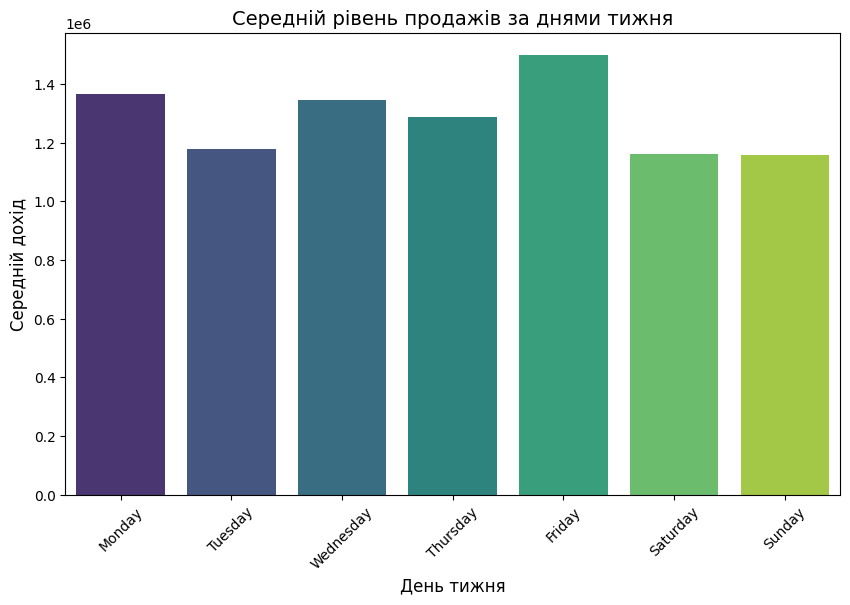

In [ ]:
df_combined['Weekday'] = df_combined['Order Date'].dt.day_name()

sales_by_weekday = df_combined.groupby('Weekday')['Revenue'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
sns.barplot(
    x=sales_by_weekday.index,
    y=sales_by_weekday.values,
    palette='viridis'
)
plt.title('Середній рівень продажів за днями тижня', fontsize=14)
plt.xlabel('День тижня', fontsize=12)
plt.ylabel('Середній дохід', fontsize=12)
plt.xticks(rotation=45)
plt.show()


Чітко видно "робочий" патерн продажів - вищі показники в робочі дні. Пік продажів у п'ятницю може бути пов'язаний з тим, що компанії намагаються закрити тижневі плани. Спад у вихідні є очікуваним, оскільки більшість бізнес-операцій відбувається в робочі дні.